Import libraries

In [52]:
import pandas as pd
import numpy as np
import talib
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

Fetch Historical data for the AAPL stock

In [53]:
# Fetch data for a specific stock
ticker = "NVDA"
start_date = datetime.strptime("2024-12-25", "%Y-%m-%d")
end_date = datetime.strptime("2025-01-28", "%Y-%m-%d")
stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data.reset_index(inplace=True)

# Inspect the data
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open     Volume
Ticker                   NVDA        NVDA        NVDA        NVDA       NVDA
0      2024-12-26  139.929993  140.850006  137.729996  139.699997  116205600
1      2024-12-27  137.009995  139.020004  134.710007  138.550003  170582600
2      2024-12-30  137.490005  140.270004  134.020004  134.830002  167734700
3      2024-12-31  134.289993  138.070007  133.830002  138.029999  155659200
4      2025-01-02  138.309998  138.880005  134.630005  136.000000  198247200


Get RSI

In [54]:
# Fill missing values in the 'Close' column first
stock_data['Close'] = stock_data['Close'].fillna(method='ffill')  # Forward-fill missing values
stock_data['Close'] = stock_data['Close'].fillna(method='bfill')  # Backward-fill if forward-fill is insufficient

# Calculate RSI after filling 'Close'
stock_data['RSI'] = talib.RSI(stock_data['Close'].values.flatten(), timeperiod=14)

# Fill the first 14 rows of RSI with the 15th row value
first_valid_rsi = stock_data.loc[14, 'RSI']  # Get the RSI value from the 15th row
stock_data.loc[:13, 'RSI'] = first_valid_rsi  # Fill the first 14 rows with this value

# Print the RSI column to verify
print(stock_data['RSI'].iloc[14])
stock_data.loc[:13, 'RSI'] = stock_data['RSI'].iloc[14]

print(stock_data['RSI'])

47.81066591787285
0     47.810666
1     47.810666
2     47.810666
3     47.810666
4     47.810666
5     47.810666
6     47.810666
7     47.810666
8     47.810666
9     47.810666
10    47.810666
11    47.810666
12    47.810666
13    47.810666
14    47.810666
15    51.054392
16    56.833079
17    56.964606
18    51.756303
19    34.094982
Name: RSI, dtype: object


/var/folders/hv/2vlnl85n369fmvwhjtsktpsh0000gn/T/ipykernel_27103/3407466581.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data['Close'] = stock_data['Close'].fillna(method='ffill')  # Forward-fill missing values
/var/folders/hv/2vlnl85n369fmvwhjtsktpsh0000gn/T/ipykernel_27103/3407466581.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data['Close'] = stock_data['Close'].fillna(method='bfill')  # Backward-fill if forward-fill is insufficient
/var/folders/hv/2vlnl85n369fmvwhjtsktpsh0000gn/T/ipykernel_27103/3407466581.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dty

Get SMA

In [55]:
stock_data['SMA50'] = talib.SMA(stock_data['Close'].values.flatten(), timeperiod=50)
stock_data['SMA20'] = talib.SMA(stock_data['Close'].values.flatten(), timeperiod=20)

print(stock_data['SMA50'])
print(stock_data['SMA50'].shape)

print(stock_data['SMA20'])
print(stock_data['SMA20'].shape)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: SMA50, dtype: float64
(20,)
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19    138.288
Name: SMA20, dtype: float64
(20,)


Find the Bollinger Band (BB Indicator)

In [56]:
stock_data['UpperBB'], stock_data['MiddleBB'], stock_data['LowerBB'] = talib.BBANDS(
    stock_data['Close'].values.flatten(), timeperiod=20
)


# Ensure there are no NaN for UpperBB
stock_data.loc[0:20, 'UpperBB'] = stock_data['UpperBB'].iloc[19]
print(stock_data['UpperBB'])


# Ensure there are no NanN for LowerBB
stock_data.loc[0:20, 'LowerBB'] = stock_data['LowerBB'].iloc[19]
print(stock_data['LowerBB'])


# Ensure there are no NanN for MiddleBB
stock_data.loc[0:20, 'MiddleBB'] = stock_data['MiddleBB'].iloc[19]
print(stock_data['MiddleBB'])



0     151.460488
1     151.460488
2     151.460488
3     151.460488
4     151.460488
5     151.460488
6     151.460488
7     151.460488
8     151.460488
9     151.460488
10    151.460488
11    151.460488
12    151.460488
13    151.460488
14    151.460488
15    151.460488
16    151.460488
17    151.460488
18    151.460488
19    151.460488
Name: UpperBB, dtype: float64
0     125.115512
1     125.115512
2     125.115512
3     125.115512
4     125.115512
5     125.115512
6     125.115512
7     125.115512
8     125.115512
9     125.115512
10    125.115512
11    125.115512
12    125.115512
13    125.115512
14    125.115512
15    125.115512
16    125.115512
17    125.115512
18    125.115512
19    125.115512
Name: LowerBB, dtype: float64
0     138.288
1     138.288
2     138.288
3     138.288
4     138.288
5     138.288
6     138.288
7     138.288
8     138.288
9     138.288
10    138.288
11    138.288
12    138.288
13    138.288
14    138.288
15    138.288
16    138.288
17    138.288
18    13

Create a trading strategy with BB, SMA, and RSI and create buy or sell signals.

In [57]:
print(stock_data[['RSI', 'Close', 'LowerBB', 'UpperBB']].info())
print(stock_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (RSI, )        20 non-null     object 
 1   (Close, NVDA)  20 non-null     float64
 2   (LowerBB, )    20 non-null     float64
 3   (UpperBB, )    20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 772.0+ bytes
None
MultiIndex([(    'Date',     ''),
            (   'Close', 'NVDA'),
            (    'High', 'NVDA'),
            (     'Low', 'NVDA'),
            (    'Open', 'NVDA'),
            (  'Volume', 'NVDA'),
            (     'RSI',     ''),
            (   'SMA50',     ''),
            (   'SMA20',     ''),
            ( 'UpperBB',     ''),
            ('MiddleBB',     ''),
            ( 'LowerBB',     '')],
           names=['Price', 'Ticker'])


In [58]:
# Flatten the MultiIndex
stock_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_data.columns]

# Verify the flattened column names
print(stock_data.columns)

# Initialize Signal column
stock_data['Signal_T'] = 0  # Default to no action

# Generate Buy and Sell Signals
stock_data.loc[
    (stock_data['RSI_'] < 30) & (stock_data[f'Close_{ticker}'] < stock_data['LowerBB_']),
    'Signal_T'
] = 1  # Buy signal

stock_data.loc[
    (stock_data['RSI_'] > 70) & (stock_data[f'Close_{ticker}'] > stock_data['UpperBB_']),
    'Signal_T'
] = -1  # Sell signal

# Verify the result
print(stock_data[['Date_', f'Close_{ticker}', 'RSI_', 'Signal_T']])

# Filter rows where Signal is 1 or -1
filtered_data = stock_data[(stock_data['Signal_T'] == 1) | (stock_data['Signal_T'] == -1)]

# Print the filtered rows
print(filtered_data)

Index(['Date_', 'Close_NVDA', 'High_NVDA', 'Low_NVDA', 'Open_NVDA',
       'Volume_NVDA', 'RSI_', 'SMA50_', 'SMA20_', 'UpperBB_', 'MiddleBB_',
       'LowerBB_'],
      dtype='object')
        Date_  Close_NVDA       RSI_  Signal_T
0  2024-12-26  139.929993  47.810666         0
1  2024-12-27  137.009995  47.810666         0
2  2024-12-30  137.490005  47.810666         0
3  2024-12-31  134.289993  47.810666         0
4  2025-01-02  138.309998  47.810666         0
5  2025-01-03  144.470001  47.810666         0
6  2025-01-06  149.429993  47.810666         0
7  2025-01-07  140.139999  47.810666         0
8  2025-01-08  140.110001  47.810666         0
9  2025-01-10  135.910004  47.810666         0
10 2025-01-13  133.229996  47.810666         0
11 2025-01-14  131.759995  47.810666         0
12 2025-01-15  136.240005  47.810666         0
13 2025-01-16  133.570007  47.810666         0
14 2025-01-17  137.710007  47.810666         0
15 2025-01-21  140.830002  51.054392         0
16 2025-01-22  1

Plot the signals

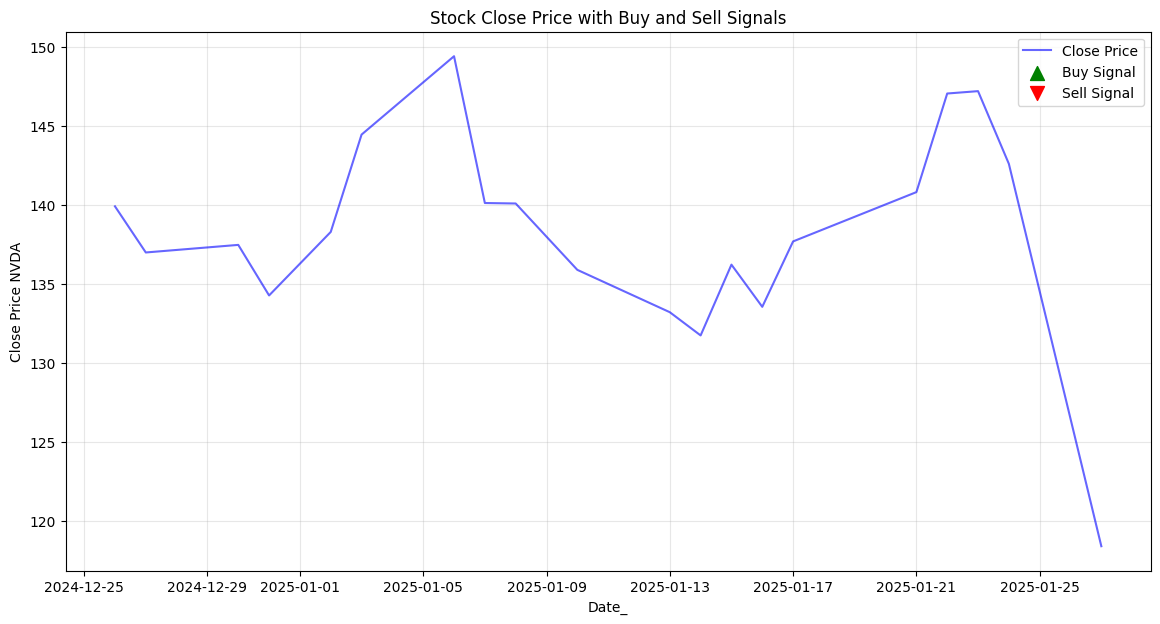

In [59]:
import matplotlib.pyplot as plt

# Filter rows with buy and sell signals
buy_signals = stock_data[stock_data['Signal_T'] == 1]
sell_signals = stock_data[stock_data['Signal_T'] == -1]

# Plot the stock's Close price
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date_'], stock_data[f'Close_{ticker}'], label='Close Price', color='blue', alpha=0.6)

# Add buy signals to the plot
plt.scatter(buy_signals['Date_'], buy_signals[f'Close_{ticker}'], label='Buy Signal', marker='^', color='green', s=100)

# Add sell signals to the plot
plt.scatter(sell_signals['Date_'], sell_signals[f'Close_{ticker}'], label='Sell Signal', marker='v', color='red', s=100)

# Plot enhancements
plt.title('Stock Close Price with Buy and Sell Signals')
plt.xlabel('Date_')
plt.ylabel(f'Close Price {ticker}')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#### Integrate SMA Indicator Strategy
- If SMA 50 > SMA 200: Buy Indicator
- If SMA 50 < SMA 200: Sell Indicator


In [60]:
# Create label for SMA Buy or Sell.
# 1 = Buy
# 0 = Hold
# -1 = Sell
sma_label = 0

# Get SMA50 and SMA200
stock_data[f"SMA50_{ticker}"] = stock_data[f"Close_{ticker}"].rolling(window=5).mean()
stock_data[f"SMA200_{ticker}"] = stock_data[f"Close_{ticker}"].rolling(window=10).mean()

stock_data['sma_label'] = 0

# Label signals
stock_data.loc[(stock_data[f"SMA50_{ticker}"] > stock_data[f"SMA200_{ticker}"]), 'sma_label'] = 1
stock_data.loc[(stock_data[f"SMA50_{ticker}"] < stock_data[f"SMA200_{ticker}"]), 'sma_label'] = -1

If SMA label and previous Signal labels are equal, we buy or sell.

In [61]:


# Generate Buy Signal: RSI < 30, Close below Lower Bollinger Band, and SMA Buy
stock_data.loc[
    (stock_data['Signal_T'] == 1) &
    (stock_data['sma_label'] == 1),
    'Signal'
] = 1  # Buy signal

# Generate Sell Signal: RSI > 70, Close above Upper Bollinger Band, and SMA Sell
stock_data.loc[
    (stock_data['Signal_T'] == -1) &
    (stock_data['sma_label'] == -1),
    'Signal'
] = -1  # Sell signal

stock_data['Signal'] = stock_data['Signal'].fillna(0)


# Save the DataFrame to a CSV file
stock_data.to_csv('stock_data.csv', index=False)

print("Data saved to 'stock_data.csv'")


Data saved to 'stock_data.csv'


Plot the signals

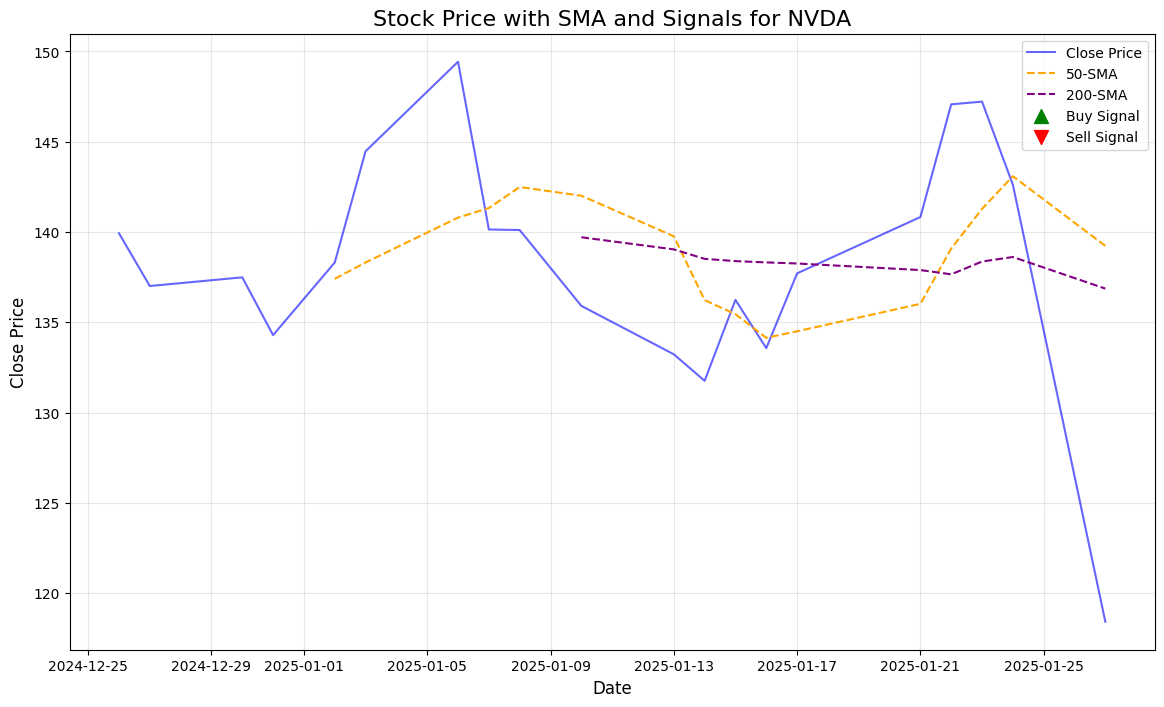

In [62]:


# Plot Close Price
plt.figure(figsize=(14, 8))
plt.plot(stock_data['Date_'], stock_data[f"Close_{ticker}"], label='Close Price', color='blue', alpha=0.6)

# Add SMA50 and SMA200
plt.plot(stock_data['Date_'], stock_data[f"SMA50_{ticker}"], label='50-SMA', color='orange', linestyle='--')
plt.plot(stock_data['Date_'], stock_data[f"SMA200_{ticker}"], label='200-SMA', color='purple', linestyle='--')

# Highlight Buy and Sell signals
buy_signals = stock_data[stock_data['Signal'] == 1]
sell_signals = stock_data[stock_data['Signal'] == -1]
plt.scatter(buy_signals['Date_'], buy_signals[f"Close_{ticker}"], label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(sell_signals['Date_'], sell_signals[f"Close_{ticker}"], label='Sell Signal', marker='v', color='red', s=100)

# Add titles and labels
plt.title(f'Stock Price with SMA and Signals for {ticker}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

### Utilize Hugging Face for Sentiment Analysis on News Outlets

Load the sentiment analysis pipeline

In [63]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import requests

pipe = pipeline("sentiment-analysis", model="ProsusAI/finbert")


tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


Device set to use mps:0


Fetch news headlines using NewsAPI for a ticker

In [64]:
NEWS_API_KEY = "927e1bf828ac45beac4ee886d8e2c2d4"
NEWS_API_URL = "https://newsapi.org/v2/everything"

def get_news(company, ticker):
    
    params = {
        "q": f'"{company}" OR "{ticker}" AND (earnings OR revenue OR profits OR market OR stocks)',
        "language": "en",
        "sortBy": "relevancy",
        "apiKey": NEWS_API_KEY,
    }

    response = requests.get(NEWS_API_URL, params=params)
    if response.status_code == 200:
        articles = response.json().get("articles", [])
        # Extract headlines and publication dates
        headlines_with_dates = [
            {"headline": article["title"], "date": article["publishedAt"]}
            for article in articles
        ]
        return headlines_with_dates
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

# Fetch news data
company = "NVIDIA"

# Fetch news data
news_data = get_news(company, ticker)

# Display the news articles with their dates
for news in news_data:
    print(f"Date: {news['date']}, Headline: {news['headline']}")



Date: 2024-12-31T16:46:43Z, Headline: Why Nvidia’s (NVDA) China Revenue Is Guaranteed Despite Restrictions
Date: 2025-01-08T00:50:19Z, Headline: Dow Jones Futures: Stock Market Sells Off As Nvidia, Palantir Tumble; What To Do Now
Date: 2024-12-31T22:12:16Z, Headline: Dow Jones Futures: Stock Market Ends 2024 On Weak Note; Tesla Deliveries Due
Date: 2024-12-27T15:35:00Z, Headline: Escalating US-China Trade War to Hurt These Tech Stocks in 2025
Date: 2025-01-07T15:08:41Z, Headline: Micron (MU) Stock Jumps for Second Day After Nvidia (NVDA) Mention
Date: 2025-01-13T19:12:13Z, Headline: Why Tech Stocks Are Dropping Monday
Date: 2024-12-27T17:24:42Z, Headline: Analyst on NVIDIA (NVDA): Investors Should Be ‘Very Vigilant’ Amid Rising Competition
Date: 2025-01-16T13:34:41Z, Headline: Quantum Computing Stocks Rally as Microsoft Pushes Quantum-Ready Future
Date: 2025-01-07T20:00:49Z, Headline: Fresh job market data, Nvidia falls from record highs: Catalysts
Date: 2025-01-06T17:56:59Z, Headline:

Analyze Sentiment using Finbert

In [65]:
def analyze_sentiment(news_data):
    for article in news_data:
        sentiment = pipe(article["headline"])[0]
        article["sentiment"] = sentiment["label"]
        article["score"] = sentiment["score"]
    return news_data

In [66]:
def group_sentiment_by_day(news_data):
    # Convert publication dates to datetime and group by day
    for article in news_data:
        article["day"] = datetime.strptime(article["date"], "%Y-%m-%dT%H:%M:%SZ").strftime('%Y-%m-%d')
    
    # Create a DataFrame
    df = pd.DataFrame(news_data)
    
    # Group by day and calculate sentiment stats
    daily_sentiment = (
        df.groupby("day")
        .agg({"score": "mean", "headline": "count", "sentiment": lambda x: x.mode()[0]})
        .rename(columns={"headline": "article_count", "score": "average_sentiment"})
        .reset_index()
    )
    return daily_sentiment

In [67]:
news_data = get_news(company, ticker)

# Analyze sentiment and group by day
if news_data:
    news_data = analyze_sentiment(news_data)
    daily_sentiment = group_sentiment_by_day(news_data)
    
    # Display results
    print(daily_sentiment)
else:
    print("No news articles found.")

           day  average_sentiment  article_count sentiment
0   2024-12-27           0.904065              6  negative
1   2024-12-30           0.928274              4  negative
2   2024-12-31           0.845173              8   neutral
3   2025-01-02           0.831177              4  negative
4   2025-01-03           0.620408              5   neutral
5   2025-01-04           0.619509              1  positive
6   2025-01-05           0.915554              1   neutral
7   2025-01-06           0.676021              3  positive
8   2025-01-07           0.799943              6  negative
9   2025-01-08           0.820788              6  negative
10  2025-01-09           0.819456              2  negative
11  2025-01-10           0.878774             10  negative
12  2025-01-12           0.798538              2  negative
13  2025-01-13           0.902345              9  negative
14  2025-01-14           0.649804              5  negative
15  2025-01-15           0.720039              4   neutr